In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
#Lectura de datos 
data = pd.read_csv('DEPURACION_FINAL.csv', sep=',')
data

,AÑO,MES,DIA,FECHA,HORA,KW-H
0,2015,1,jueves,1,0,3200
1,2015,1,jueves,1,1,3200
2,2015,1,jueves,1,2,2400
3,2015,1,jueves,1,3,2400
4,2015,1,jueves,1,4,2400
...,...,...,...,...,...,...
43819,2019,12,martes,31,19,3400
43820,2019,12,martes,31,20,3600
43821,2019,12,martes,31,21,3800
43822,2019,12,martes,31,22,4000


In [7]:
#Transformaciones previas 
data['KW-H'] = [valor.replace(",", ".") for valor in data['KW-H'] ]
data['KW-H'] = [float(valor) for valor in data['KW-H'] ]
data

,AÑO,MES,DIA,FECHA,HORA,KW-H
0,2015,1,jueves,1,0,3200.0
1,2015,1,jueves,1,1,3200.0
2,2015,1,jueves,1,2,2400.0
3,2015,1,jueves,1,3,2400.0
4,2015,1,jueves,1,4,2400.0
...,...,...,...,...,...,...
43819,2019,12,martes,31,19,3400.0
43820,2019,12,martes,31,20,3600.0
43821,2019,12,martes,31,21,3800.0
43822,2019,12,martes,31,22,4000.0


In [8]:
# data['AÑO'] = pd.to_numeric(data['AÑO'])
# data

[[<matplotlib.axis.XTick at 0x7fc9d8a90510>]]

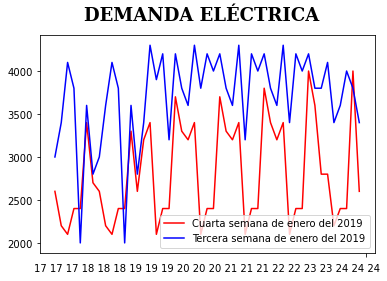

In [9]:
#Figura 5.2: Curva demanda eléctrica semanal
#Tomamos la tercera y cuarta semana del mes de enero del 2019 
# Fecha 25-31 de enero (7 dias)  de 17H-23H| 17-23 de enero (7 dias)  de 17H-23H
mes = 1
fecha_inicio = 18
fecha_fin = 24
year = 2019
hora_inicio = 17

data_ter_sem_dic = data[(data['FECHA'] >=fecha_inicio) & 
                         (data['FECHA'] <=fecha_fin) & 
                             (data['MES'] == mes )& 
                             (data['AÑO'] == year) & 
                             (data['HORA'] >=hora_inicio)]
data_cuar_sem_dic = data[(data['FECHA'] >=fecha_fin + 1) &  
                         (data['MES'] == mes )& 
                         (data['AÑO'] == year) & 
                         (data['HORA'] >=hora_inicio)]
data_cuar_sem_dic = data_cuar_sem_dic.sort_values(['HORA','FECHA'])
data_ter_sem_dic = data_ter_sem_dic.sort_values(['HORA', 'FECHA'])

data_ter_sem_dic['HORA'] = data_ter_sem_dic['HORA'].apply(str)
data_cuar_sem_dic['HORA'] = data_cuar_sem_dic['HORA'].apply(str)

#Creamos nuevo campo para que los valores de x en la grafica no se sobrepongan 
data_ter_sem_dic['HORA-FECHA'] = data_ter_sem_dic['HORA'].str.cat(data_ter_sem_dic['DIA'], sep=' ')
data_cuar_sem_dic['HORA-FECHA'] = data_cuar_sem_dic['HORA'].str.cat(data_cuar_sem_dic['DIA'], sep=' ')

#Grafica Hora-dia VS Consumo
fig, ax_52 = plt.subplots()

ax_52.plot(data_cuar_sem_dic['HORA-FECHA'], 
         data_cuar_sem_dic['KW-H'], 
         color = 'red', 
         label = 'Cuarta semana de enero del 2019')
ax_52.plot(data_ter_sem_dic['HORA-FECHA'], 
         data_ter_sem_dic['KW-H'], 
         color = 'blue', 
         label = 'Tercera semana de enero del 2019')
plt.suptitle('DEMANDA ELÉCTRICA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.xlabel('17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 23 23 24 24 24')
plt.legend()
ax_52.set(xticks ='')

In [10]:
data_estudio = data_cuar_sem_dic 
data_estudio

,AÑO,MES,DIA,FECHA,HORA,KW-H,HORA-FECHA
35657,2019,1,viernes,25,17,2600.0,17 viernes
35681,2019,1,sábado,26,17,2200.0,17 sábado
35705,2019,1,domingo,27,17,2100.0,17 domingo
35729,2019,1,lunes,28,17,2400.0,17 lunes
35753,2019,1,martes,29,17,2400.0,17 martes
35777,2019,1,miércoles,30,17,3400.0,17 miércoles
35801,2019,1,jueves,31,17,2700.0,17 jueves
35658,2019,1,viernes,25,18,2600.0,18 viernes
35682,2019,1,sábado,26,18,2200.0,18 sábado
35706,2019,1,domingo,27,18,2100.0,18 domingo


In [11]:
#Tabla 5.1  Análisis descriptiva con datos reales de la demanda eléctrica
#ULTIMOS 7 DIAS DE LA SEMANA DE ENERO 

data_estudio.describe()['KW-H']
maximo = np.max(data_estudio['KW-H'])
print('Máximo = {}'.format(maximo))
minimo = np.min(data_estudio['KW-H'])
print('Mínimo = {}'.format(minimo))
# q75, q25 = np.percentile(data_estudio['KW-H'], [75, 25])
# rango = q75 - q25
rango = maximo - minimo
print('Rango = {}'.format(rango))
media = np.mean(data_estudio['KW-H'])
print('Media = {}'.format(media))
mediana = data_estudio['KW-H'].median()
print('Mediana = {}'.format(mediana))
varianza = data_estudio['KW-H'].var()
print('Varianza = {}'.format(varianza))
std = np.std(data_estudio['KW-H'])
print('Desviación Estándar = {}'.format(std))
coef_var = np.std(data_estudio['KW-H']) /np.mean(data_estudio['KW-H']) * 100
print('Coeficiente de variación = {} %'.format(coef_var))
lim_max, lim_min = np.percentile((data_estudio['KW-H']), [75, 25])
lim_max = media + 1 * std
lim_min = media - 1 * std
print('Límite máximo = {}'.format(lim_max))
print('Límite mínimo = {}'.format(lim_min))

data_estudio.describe()['KW-H']


Máximo = 4000.0
Mínimo = 2100.0
Rango = 1900.0
Media = 2804.081632653061
Mediana = 2600.0
Varianza = 335816.3265306122
Desviación Estándar = 573.5529026267935
Coeficiente de variación = 20.454215595860905 %
Límite máximo = 3377.634535279855
Límite mínimo = 2230.5287300262676


count      49.000000
mean     2804.081633
std       579.496615
min      2100.000000
25%      2400.000000
50%      2600.000000
75%      3300.000000
max      4000.000000
Name: KW-H, dtype: float64

In [12]:
#Funciones
def funcionConstante(x, constante):
    return constante

[[<matplotlib.axis.XTick at 0x7fc9d7d74410>]]

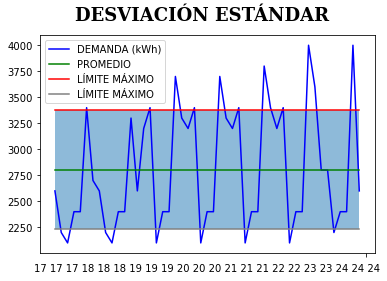

In [13]:
#Figura 5.3: Desviación estándar de datos (de la semana en estudio)

datos_hf = data_estudio['HORA-FECHA']
datos_kwh = data_estudio['KW-H']

fig, ax_53 = plt.subplots()

ax_53.plot(datos_hf, 
         datos_kwh, 
         color = 'blue', 
         label = 'DEMANDA (kWh)')
ax_53.plot(datos_hf, 
         [funcionConstante(x, media) for x in datos_hf], 
         color = 'green', 
         label = 'PROMEDIO')

ax_53.plot(datos_hf, 
         [funcionConstante(x, lim_max) for x in datos_hf], 
         color = 'red', 
         label = 'LÍMITE MÁXIMO')

ax_53.plot(datos_hf, 
         [funcionConstante(x, lim_min) for x in datos_hf], 
         color = 'gray', 
         label = 'LÍMITE MÁXIMO')
ax_53.fill_between(datos_hf,
                   [funcionConstante(x, lim_max) for x in datos_hf], 
                   [funcionConstante(x, lim_min) for x in datos_hf],
                   alpha = .5,
                   linewidth = 0
                  )

plt.suptitle('DESVIACIÓN ESTÁNDAR',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.xlabel('17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 23 23 24 24 24')
plt.legend()
ax_53.set(xticks ='')

[[<matplotlib.axis.XTick at 0x7fc9d2fb3a10>]]

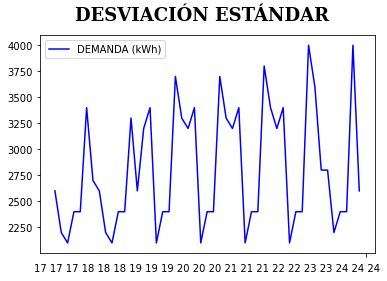

In [14]:
# Figura 5.4:Curva de la demanda eléctrica de la semana en estudio
fig, ax_54 = plt.subplots()

ax_54.plot(datos_hf, 
         datos_kwh, 
         color = 'blue', 
         label = 'DEMANDA (kWh)')

plt.suptitle('DESVIACIÓN ESTÁNDAR',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.xlabel('17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 23 23 24 24 24')
plt.legend()
ax_54.set(xticks ='')


In [16]:
# Figura 5.5: Capacidades del proceso para la demanda de energía eléctrica (datos reales – 1 semana)

#Exportamos la data de estufio 

data_estudio.to_csv('data_sem_enero.csv')


[[<matplotlib.axis.XTick at 0x7fc9d8225150>,

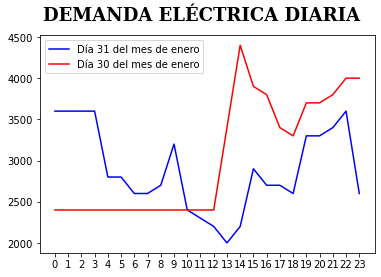

In [32]:
# Figura 5.6: Curva de la demanda eléctrica diaria con intervalos de 1 hora
#Datos del 31 de enero y del 30 

fecha_ld_enero = 31
fecha_pld_enero = 30

datos_31 = data[(data['FECHA'] ==fecha_ld_enero) & 
                             (data['MES'] == mes )& 
                             (data['AÑO'] == year)]
datos_30 = data[(data['FECHA'] ==fecha_pld_enero) & 
                             (data['MES'] == mes )& 
                             (data['AÑO'] == year)]

fig, ax_56 = plt.subplots()

ax_56.plot(datos_31['HORA'], 
         datos_31['KW-H'], 
         color = 'blue', 
         label = 'Día 31 del mes de enero')

ax_56.plot(datos_30['HORA'], 
         datos_30['KW-H'], 
         color = 'red', 
         label = 'Día 30 del mes de enero')

plt.suptitle('DEMANDA ELÉCTRICA DIARIA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()
ax_56.set(xticks = range(0, 24))

In [33]:
#Exportacion de datos para minitab, datos del 31 de enero del 2019

datos_31.to_csv('datos_31Jan2019.csv')

In [34]:
datos_31.describe()

,AÑO,MES,FECHA,HORA,KW-H
count,24.0,24.0,24.0,24.000000,24.000000
mean,2019.0,1.0,31.0,11.500000,2887.500000
std,0.0,0.0,0.0,7.071068,511.019867
min,2019.0,1.0,31.0,0.000000,2000.000000
25%,2019.0,1.0,31.0,5.750000,2600.000000
50%,2019.0,1.0,31.0,11.500000,2750.000000
75%,2019.0,1.0,31.0,17.250000,3325.000000
max,2019.0,1.0,31.0,23.000000,3600.000000
